In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import cmocean as ccm

In [6]:
# dictionary of the colorblind friendly colors used
CB_colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

In [3]:
chunk_size = {"x":133,"y":320}
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
mesh_hgr = xr.open_dataset(diri+'mesh_hgr.nc',chunks=chunk_size).squeeze()
tmask = mesh_hgr.tmask.isel(nav_lev=0)
nav_lon = mesh_hgr.nav_lon
nav_lat = mesh_hgr.nav_lat

mbathy = xr.open_dataset(diri+'eORCA025.L75_domain_cfg_closed_seas_greenland.nc')['bathy_meter'].isel(t=0) # grille lat/lon

BGRmask = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/TRANSPORT_WP1/BGRmaskobs.nc').BGRmask.squeeze()

In [11]:
# polar view
loncentr=200
latcentr=90

sath=2086000
bathy_levels = [200,1000,2000,4000] # We will apply a Gaussian filter to smooth the data. 
color_levels= ['k','navy','mediumblue','slateblue']


carte_bathy.png


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


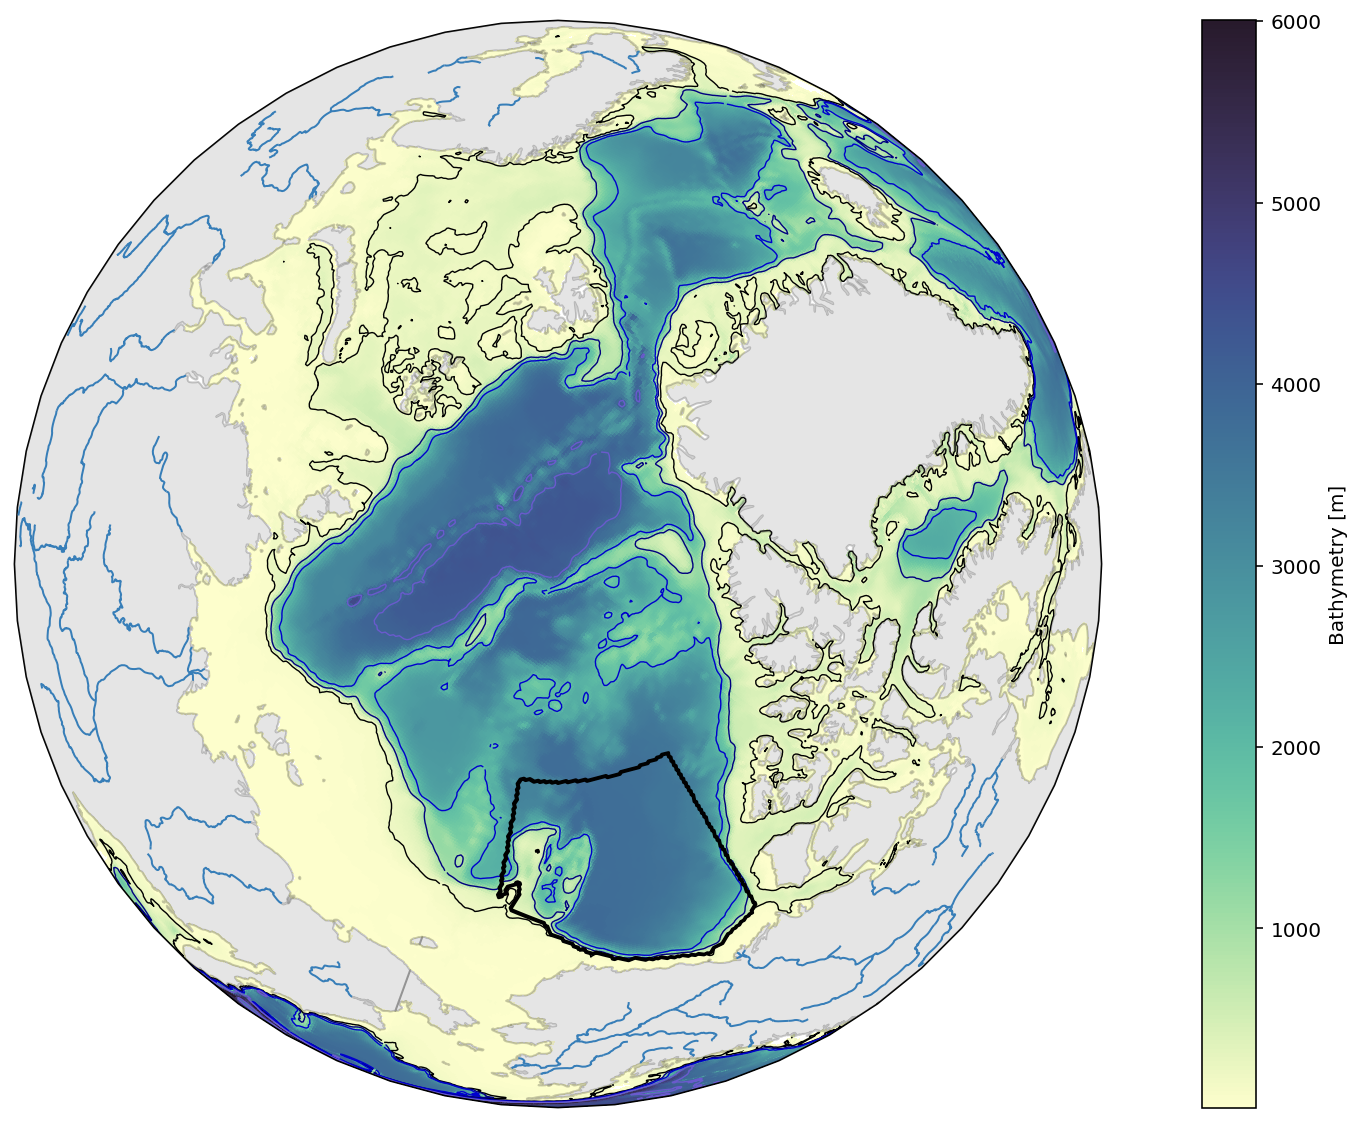

In [30]:
#========= CREATE FIGURE
diro = "/gpfsscratch/rech/cli/uor98hu/PLOTS/"
namo  ="carte_bathy.png"
print(namo)
#===========================================
fig = plt.figure(figsize=([18,10]),facecolor='none', dpi=72*2)

trdata  = ccrs.PlateCarree() # Data system proj (if coords are in lat lon, use PlateCarre here)
ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))

rivers = cartopy.feature.NaturalEarthFeature(category='physical', name='rivers_lake_centerlines',scale='50m',facecolor='none',edgecolor=CB_colors['blue'])
clr2 = ax.add_feature(rivers,alpha=1,facecolor='none',edgecolor=CB_colors['blue'],zorder=6)
cl2 = ax.add_feature(cfeature.LAND.with_scale('50m'),facecolor="gray",edgecolor= 'k',alpha=0.2,zorder=5)

Ct1 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon<0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
Ct2 = ax.contour(nav_lon,nav_lat,mbathy.where(nav_lon>0), bathy_levels,colors=color_levels,linewidths=0.7,linestyles='solid',transform=trdata)
ax.contour(nav_lon,nav_lat,BGRmask,1,colors="k",transform=trdata)

data2plot = (mbathy).where(tmask!=0,np.nan).squeeze()
cs  = ax.pcolormesh(nav_lon, nav_lat, data2plot,shading='flat',transform=trdata, cmap=ccm.cm.deep) # cmap = mycm1,norm=norm1)

ax.set_global()
fig.colorbar(cs, ax=ax, label="Bathymetry [m]")

plt.show()
fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight',edgecolor='none') 
plt.close(fig)